In [42]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [43]:
# Abro el CSV que guardé de la fase 1
df = pd.read_csv("../df_combinado.csv")
df.head()


,Loyalty Number,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2018,2018,2017,1,0,0,0,0,0.0,0,0
1,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2018,2018,2017,2,3,0,3,2823,282.0,0,0
2,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2018,2018,2017,3,0,0,0,0,0.0,0,0
3,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2018,2018,2017,4,0,0,0,0,0.0,0,0
4,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2018,2018,2018,10,6,2,8,3352,335.0,465,38


In [44]:
df.dtypes

Loyalty Number                   int64
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year                int64
Cancellation Month               int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object

## FASE 2: VISUALIZACIÓN ##

In [45]:
# 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
reserv_mes = df.groupby(['Year', 'Month'])['Flights Booked'].sum().reset_index()
reserv_mes

,Year,Month,Flights Booked
0,2017,1,47766
1,2017,2,47691
2,2017,3,64271
3,2017,4,55720
4,2017,5,65279
5,2017,6,80493
6,2017,7,89288
7,2017,8,78692
8,2017,9,63304
9,2017,10,60351


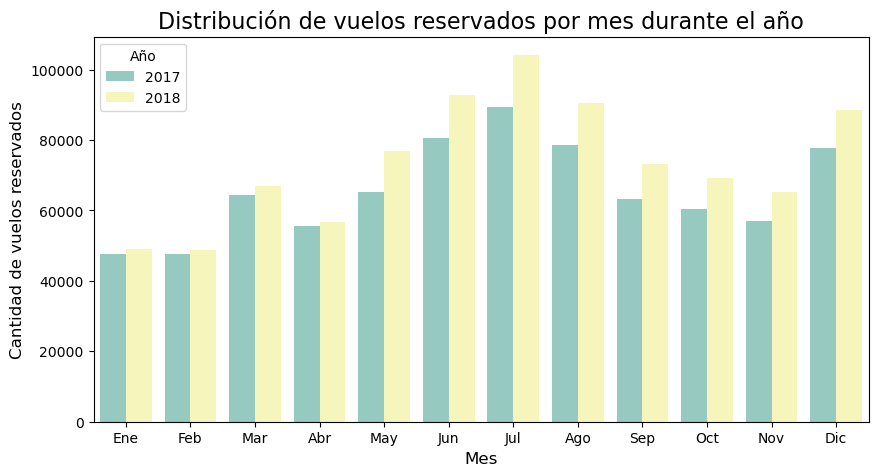

In [46]:
# Este gráfico es ideal porq tengo varios años de datos y deseo comparar cómo se distribuyeron los vuelos reservados en cada mes a lo largo de diferentes años.
# Graficar con Seaborn
plt.figure(figsize=(10, 5));  # Tamaño de la figura (ajustable)
sns.barplot(data=reserv_mes, x='Month', y='Flights Booked', hue='Year', palette= "Set3");

# Personalización del gráfico
plt.title('Distribución de vuelos reservados por mes durante el año', fontsize=16);
plt.xlabel('Mes', fontsize=12);
plt.ylabel('Cantidad de vuelos reservados', fontsize=12);
plt.xticks(ticks=range(12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']);
plt.legend(title='Año', loc='upper left');


Veo que hay un aumento significativo de las reservas de vuelos entre los meses de mayo y septiembre, con un pico especialmente notable en julio y diciembre, que coinciden con meses feriados y periodos de vacaciones, lo que podría explicar el mayor volumen de reservas.

In [47]:
# 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?
# Hago un .columns para mirar las variables que tengo

df.columns

Index(['Loyalty Number', 'Province', 'City', 'Postal Code', 'Gender',
       'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV',
       'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

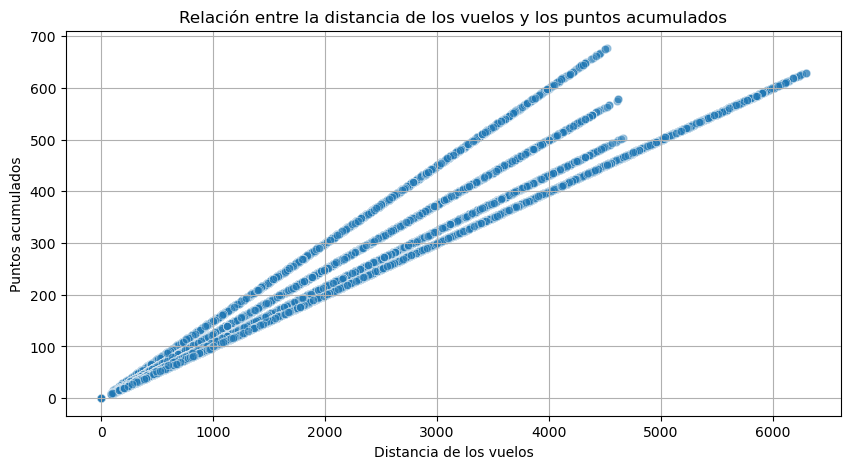

In [62]:
# Un scatterplot es ideal cuando queremos visualizar la relación entre dos variables numéricas

plt.figure(figsize=(10, 5))

# Creamos el scatterplot
sns.scatterplot(x="Distance", y="Points Accumulated", data=df, alpha=0.5)

# Añadimos el título y las etiquetas de los ejes
plt.title('Relación entre la distancia de los vuelos y los puntos acumulados')
plt.xlabel('Distancia de los vuelos')
plt.ylabel('Puntos acumulados')

# Mostramos la gráfica
plt.grid(True)
plt.show()

Se puede apreciar que existe una relación entre ambas variables, ya que a medida que aumenta la distancia, también lo hacen los puntos acumulados

In [49]:
# 3. ¿Cuál es la distribución de los clientes por provincia o estado?

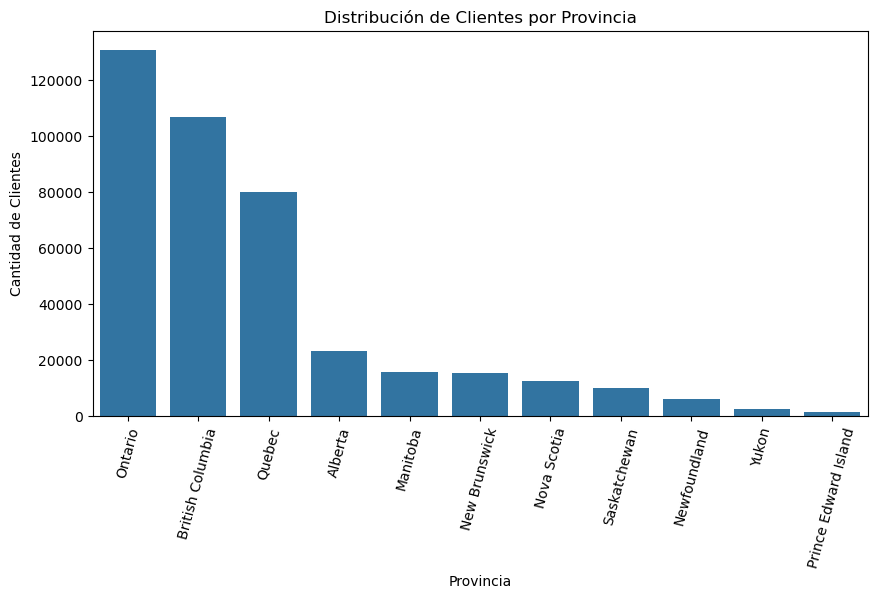

In [63]:
# Un countplot cuenta cuántas veces aparece cada categoría en una columna específica

# Configuración de tamaño de la figura
plt.figure(figsize=(10, 5))

# Creamos un gráfico de barras
sns.countplot(data=df, x="Province", order=df["Province"].value_counts().index)

# Rotar etiquetas del eje x para mejor visualización
plt.xticks(rotation=75)

# Añadir títulos y etiquetas
plt.title('Distribución de Clientes por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Clientes')

# Mostrar el gráfico
plt.show()

Observo la mayoría de los clientes son de Ontario, British Columbia y Quebec.

In [ ]:
# 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [ ]:
# El barplot es útil cuando tengo una variable categórica en el eje X y deseo comparar algún tipo de medida (como el promedio, suma, mediana, etc.) de una variable numérica en el eje Y

/var/folders/_8/rv04zc812vngdv98w27kqfbw0000gp/T/ipykernel_50072/1274738233.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Education', y='Salary', estimator=np.mean, ci=None, order=df['Education'].value_counts().index)


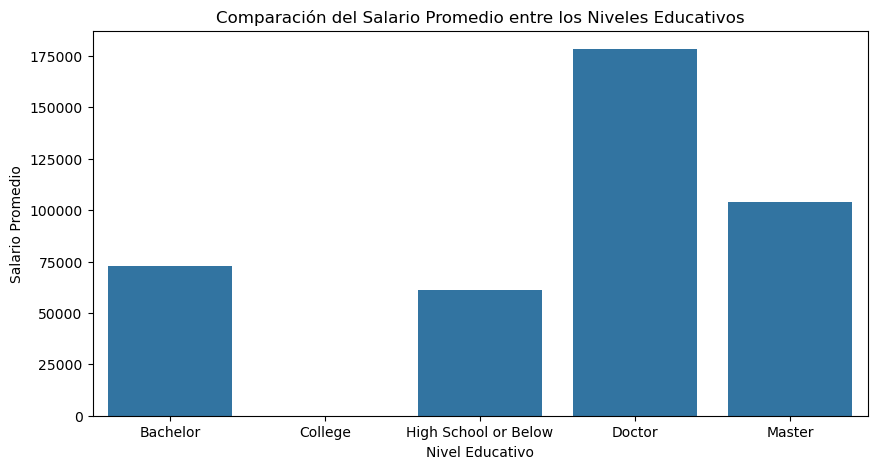

In [61]:
# Configuración de tamaño de la figura
plt.figure(figsize=(10, 5))

# Crear el gráfico de barras
sns.barplot(data=df, x='Education', y='Salary', estimator=np.mean, ci=None, order=df['Education'].value_counts().index)

# Añadir títulos y etiquetas
plt.title('Comparación del Salario Promedio entre los Niveles Educativos')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')

# Mostrar el gráfico
plt.show()

Concluyo que los clientes con niveles educativos Doctor y Master tienen un salario promedio superior a Bachelor y High School or below. 
* El nivel educativo 'College' me aparece en 0 debido a los cambios que hice en nulos. No tienen salario.

In [ ]:
# 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [56]:
df['Loyalty Card'].unique()

array(['Star', 'Aurora', 'Nova'], dtype=object)

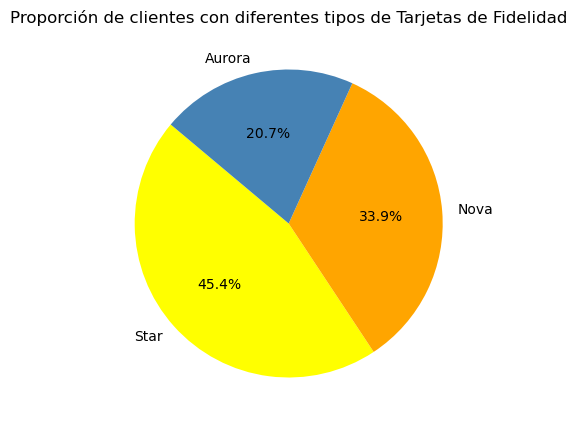

In [65]:
# Contamos el número de clientes para cada tipo de tarjeta de fidelidad
loyalty_card_counts = df['Loyalty Card'].value_counts()

# Configuración del tamaño de la figura
plt.figure(figsize=(5, 5))

# Creamos el gráfico peplot
plt.pie(loyalty_card_counts, labels=loyalty_card_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FFFF00', '#FFA500', '#4682B4'])

# Añadir un título
plt.title('Proporción de clientes con diferentes tipos de Tarjetas de Fidelidad')

# Mostrar el gráfico
plt.show()

Puedo observar que casi el 50% de los clientes tiene Loyalty Card tipo Star

In [ ]:
# 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

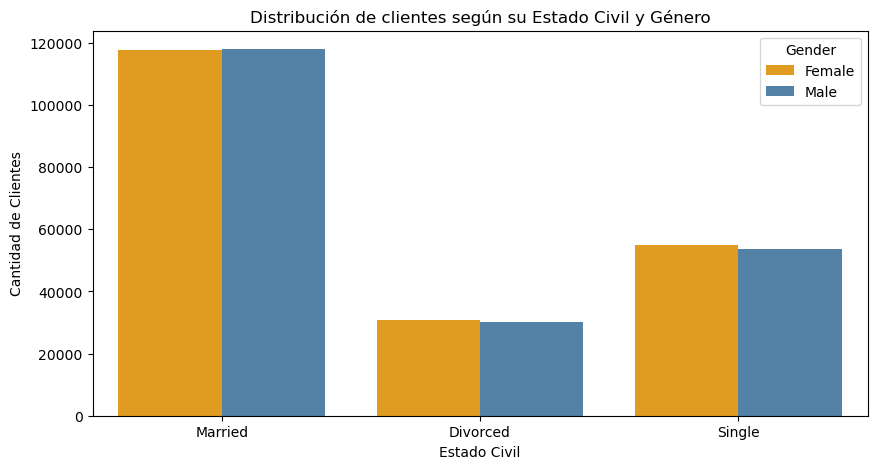

In [66]:
# Configuración del tamaño de la figura
plt.figure(figsize=(10, 5))

# Creamos el gráfico countplot
sns.countplot(data=df, x='Marital Status', hue='Gender', palette=['#FFA500', '#4682B4'])

# Añadir títulos y etiquetas
plt.title('Distribución de clientes según su Estado Civil y Género')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de Clientes')

# Mostrar el gráfico
plt.show()

Observo que la mayoría de los clientes está casada/o (estado civil 'Married'), y que casi no existe diferencia en la cantidad de clientes entre los géneros. También observo una pequeña variación (siendo mayor la cantidad de mujeres que hombres) entre géneros en el grupo de clientes solteros. 